C:\Users\hehey\AppData\Local\Temp\ipykernel_33472\2282628589.py:21: RuntimeWarning: divide by zero encountered in log10
  results_db = 10 * np.log10(results)


Minimum dB value: -inf
Corresponding n: 2
Corresponding m: 62500 (log2(m) = 15.931568569324174)


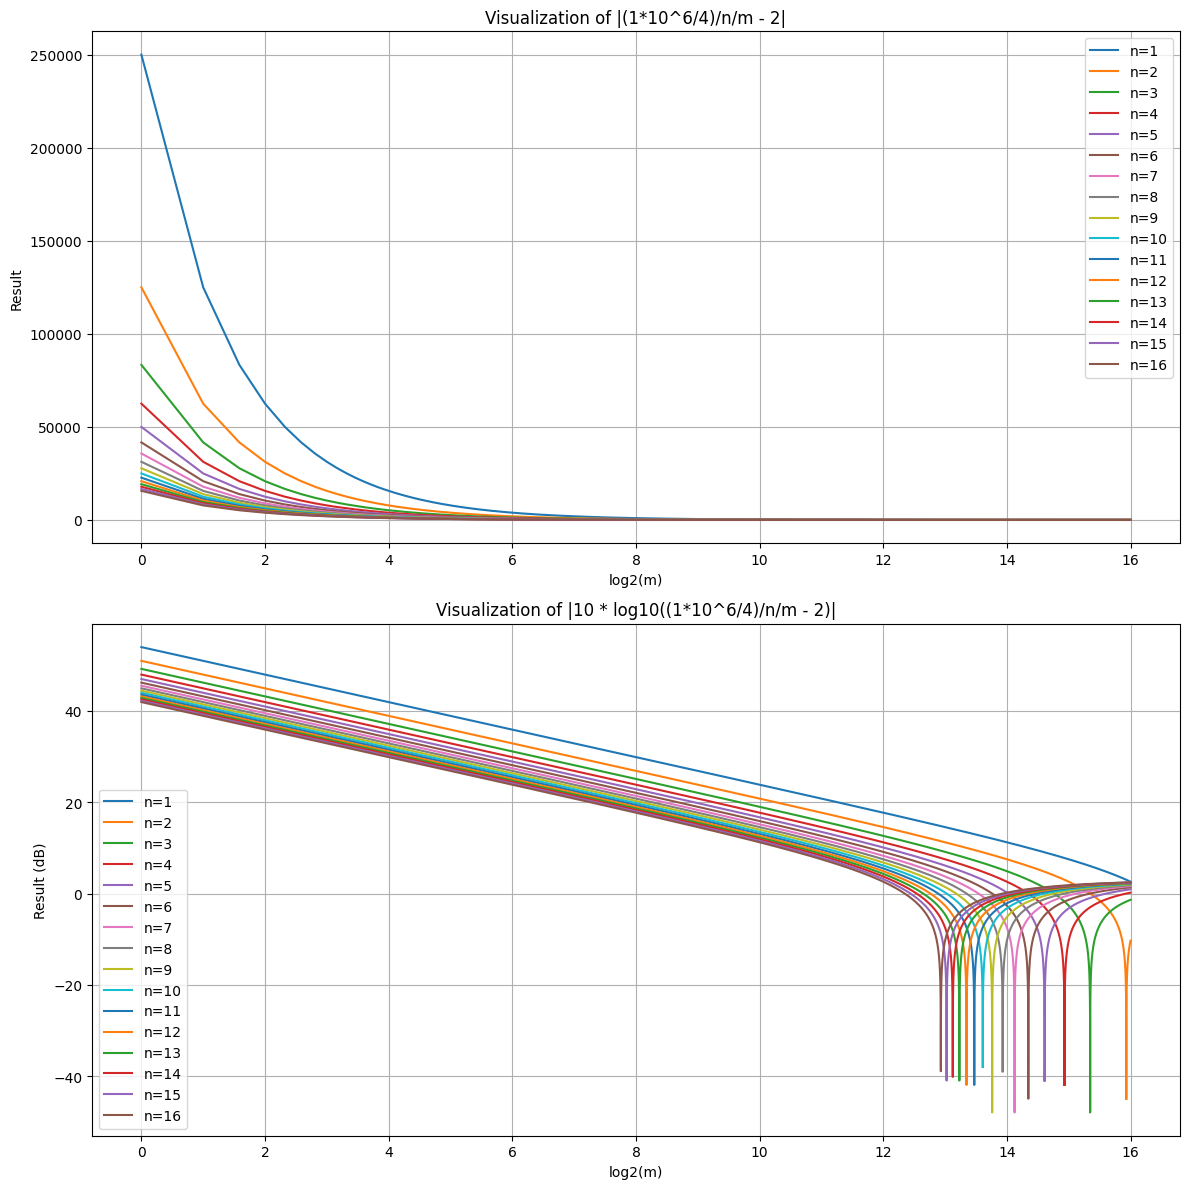

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义n和m的范围
n_values = np.arange(1, 17)
m_values = np.arange(1, 2**16 + 1)

# 计算结果并存储在二维数组中
results = np.zeros((len(n_values), len(m_values)))

for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        result = (1 * 10**6 / 4) / n / m - 2
        # 将小于0的点设置为其绝对值
        if result < 0:
            results[i, j] = -result
        else:
            results[i, j] = result

# 将结果转换为分贝值
results_db = 10 * np.log10(results)

# 找出分贝值最小的点
min_db_value = np.min(results_db)
min_db_index = np.unravel_index(np.argmin(results_db), results_db.shape)
min_n = n_values[min_db_index[0]]
min_m = m_values[min_db_index[1]]
min_log2_m = np.log2(min_m)  # 定义min_log2_m变量

# 打印最小分贝值及其对应的n和m
print(f"Minimum dB value: {min_db_value}")
print(f"Corresponding n: {min_n}")
print(f"Corresponding m: {min_m} (log2(m) = {min_log2_m})")

# 创建图形和子图
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# 绘制原曲线
for i, n in enumerate(n_values):
    axs[0].plot(np.log2(m_values), results[i, :], label=f"n={n}")
axs[0].set_xlabel("log2(m)")
axs[0].set_ylabel("Result")
axs[0].set_title("Visualization of |(1*10^6/4)/n/m - 2|")
axs[0].legend()
axs[0].grid(True)

# 绘制分贝值曲线
for i, n in enumerate(n_values):
    axs[1].plot(np.log2(m_values), results_db[i, :], label=f"n={n}")
axs[1].set_xlabel("log2(m)")
axs[1].set_ylabel("Result (dB)")
axs[1].set_title("Visualization of |10 * log10((1*10^6/4)/n/m - 2)|")
axs[1].legend()
axs[1].grid(True)

# 标注分贝值最小的点
axs[1].plot(min_log2_m, min_db_value, "ro", markersize=10)  # 标注最小值点
axs[1].annotate(
    f"Min dB value: {min_db_value:.2f}\nn: {min_n}, m: {min_m}",
    xy=(min_log2_m, min_db_value),
    xytext=(min_log2_m + 1, min_db_value + 1),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=12,
    color="blue",
)
# 调整布局
plt.tight_layout()
plt.show()

# 保存结果到csv文件
np.savetxt("results.csv", results, delimiter=",")
np.savetxt("results_db.csv", results_db, delimiter=",")


计算$|(1 * 10**6 / 4) / n / m - 2|$,则有这个数离0越近,即$(1 * 10**6 / 4) / n / m $离2越近,与我们的预期值越贴合,则性能越好

根据计算,在2,62500处有最小值-inf

但是考虑到如果在$\log_2(m) = 16 $处可以设计的话,程序能更简单一些(不需要中断之类的事情对计时器进行置数),而且$\log_2(m) = 16 , n = 2$时,其db值仍然足够小,为

```
Minimum dB value at log2(m) = 16: -10.331481677362753 (n = 2, m = 65536)
```



Minimum dB value at log2(m) = 1: 38.92678836731373 (n = 16, m = 2)
Minimum dB value at log2(m) = 2: 35.91537618970132 (n = 16, m = 4)
Minimum dB value at log2(m) = 3: 32.902850936237556 (n = 16, m = 8)
Minimum dB value at log2(m) = 4: 29.888096962342754 (n = 16, m = 16)
Minimum dB value at log2(m) = 5: 26.868875243933417 (n = 16, m = 32)
Minimum dB value at log2(m) = 6: 23.840676590543094 (n = 16, m = 64)
Minimum dB value at log2(m) = 7: 20.794356409481352 (n = 16, m = 128)
Minimum dB value at log2(m) = 8: 17.71110717036638 (n = 16, m = 256)
Minimum dB value at log2(m) = 9: 14.551126399873382 (n = 16, m = 512)
Minimum dB value at log2(m) = 10: 11.225038613621876 (n = 16, m = 1024)
Minimum dB value at log2(m) = 11: 7.504616868802181 (n = 16, m = 2048)
Minimum dB value at log2(m) = 12: 2.588041848351751 (n = 16, m = 4096)
Minimum dB value at log2(m) = 13: -14.621153460947022 (n = 15, m = 8192)
Minimum dB value at log2(m) = 14: -10.331481677362753 (n = 8, m = 16384)
Minimum dB value at lo

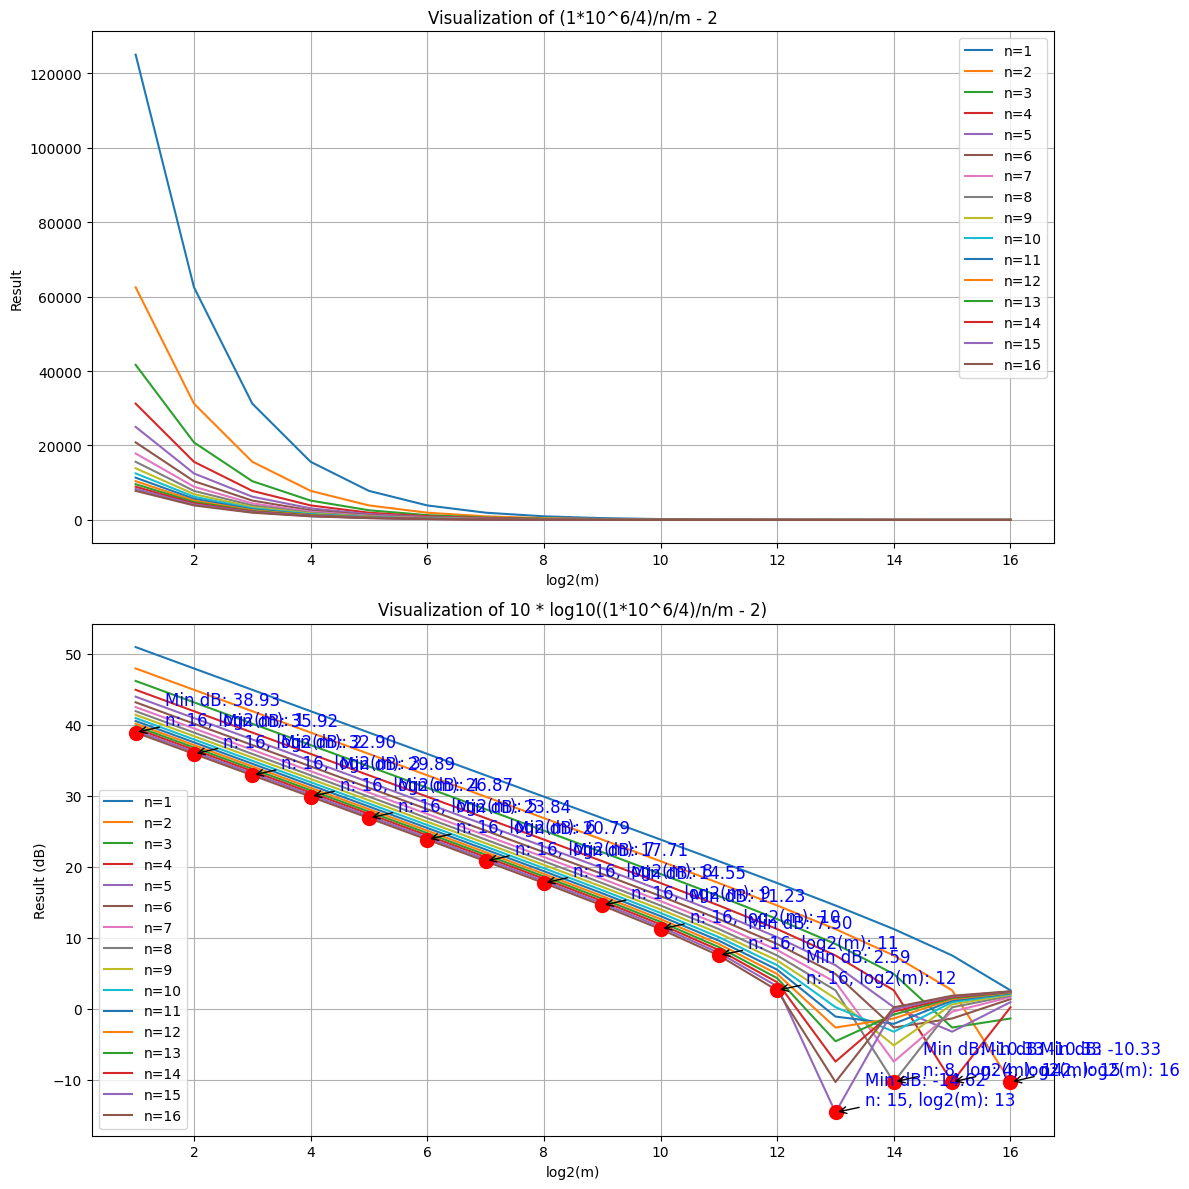

log2(m) = 1:
  n = 1, dB value = 50.96903064240756
  n = 2, dB value = 47.9586611969829
  n = 3, dB value = 46.19767911652939
  n = 4, dB value = 44.94822225943779
  n = 5, dB value = 43.97905263723669
  n = 6, dB value = 43.18717068352793
  n = 7, dB value = 42.51763329287728
  n = 8, dB value = 41.93764432764385
  n = 9, dB value = 41.4260496066014
  n = 10, dB value = 40.9684052033139
  n = 11, dB value = 40.55440885293875
  n = 12, dB value = 40.17645374413966
  n = 13, dB value = 39.828763180530224
  n = 14, dB value = 39.50684684468665
  n = 15, dB value = 39.20714510767036
  n = 16, dB value = 38.92678836731373

log2(m) = 2:
  n = 1, dB value = 47.9586611969829
  n = 2, dB value = 44.94822225943779
  n = 3, dB value = 43.18717068352793
  n = 4, dB value = 41.93764432764385
  n = 5, dB value = 40.9684052033139
  n = 6, dB value = 40.17645374413966
  n = 7, dB value = 39.50684684468665
  n = 8, dB value = 38.92678836731373
  n = 9, dB value = 38.415124130794425
  n = 10, dB value 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义n和m的范围
n_values = np.arange(1, 17)
log2_m_values = np.arange(1, 17)  # log2(m) 的范围是 1 到 16

# 计算结果并存储在二维数组中
results = np.zeros((len(n_values), len(log2_m_values)))

for i, n in enumerate(n_values):
    for j, log2_m in enumerate(log2_m_values):
        m = 2**log2_m
        result = (1 * 10**6 / 4) / n / m - 2
        # 将小于0的点设置为其绝对值
        if result < 0:
            results[i, j] = -result
        else:
            results[i, j] = result

# 将结果转换为分贝值
results_db = 10 * np.log10(results)

# 找出每个 log2(m) 对应的最小分贝值点
min_db_values = []
min_db_points = []

for j, log2_m in enumerate(log2_m_values):
    min_db_value = np.min(results_db[:, j])
    min_db_index = np.argmin(results_db[:, j])
    min_n = n_values[min_db_index]
    min_db_values.append(min_db_value)
    min_db_points.append((min_n, log2_m))

# 打印每个 log2(m) 的最小分贝值及其对应的 n 和 m
for log2_m, min_db_value, (min_n, log2_m) in zip(log2_m_values, min_db_values, min_db_points):
    print(f"Minimum dB value at log2(m) = {log2_m}: {min_db_value} (n = {min_n}, m = {2**log2_m})")

# 创建图形和子图
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# 绘制原曲线
for i, n in enumerate(n_values):
    axs[0].plot(log2_m_values, results[i, :], label=f'n={n}')
axs[0].set_xlabel('log2(m)')
axs[0].set_ylabel('Result')
axs[0].set_title('Visualization of (1*10^6/4)/n/m - 2')
axs[0].legend()
axs[0].grid(True)

# 绘制分贝值曲线
for i, n in enumerate(n_values):
    axs[1].plot(log2_m_values, results_db[i, :], label=f'n={n}')
axs[1].set_xlabel('log2(m)')
axs[1].set_ylabel('Result (dB)')
axs[1].set_title('Visualization of 10 * log10((1*10^6/4)/n/m - 2)')
axs[1].legend()
axs[1].grid(True)

# 标注每个 log2(m) 的最小分贝值点
for (min_n, log2_m), min_db_value in zip(min_db_points, min_db_values):
    axs[1].plot(log2_m, min_db_value, 'ro', markersize=10)  # 增大标注点的大小
    axs[1].annotate(f"Min dB: {min_db_value:.2f}\nn: {min_n}, log2(m): {log2_m}",
                    xy=(log2_m, min_db_value), xytext=(log2_m + 0.5, min_db_value + 1),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=12, color='blue')

# 调整布局
plt.tight_layout()
plt.show()

# 输出 log2(m) 为整数时的 db 值
for j, log2_m in enumerate(log2_m_values):
    print(f"log2(m) = {log2_m}:")
    for i, n in enumerate(n_values):
        print(f"  n = {n}, dB value = {results_db[i, j]}")
    print()

# 保存结果到 csv 文件
np.savetxt('results_log2_m_integers.csv', results, delimiter=',')
np.savetxt('results_db_log2_m_integers.csv', results_db, delimiter=',')

